# Calculating Betas Using Pandas DataFrames

## 1. Import Libraries and Dependencies

In [2]:
# Import necessary libraries and dependencies
import pandas as pd
from pathlib import Path
%matplotlib inline

## 2. Create a Path to the File Using Pathlib.

In [3]:
# Set the file paths for the CSVs using the Path class from the pathlib library
csvpath = Path('../Resources/MSFT.csv')
csvpath1 = Path('../Resources/SP500.csv')

## 3. Read the CSV into a Pandas DataFrame.

In [4]:
# Read the daily closing prices of MSFT, set the `date` as a datetime index
msft = pd.read_csv(csvpath, index_col='date', parse_dates=True, infer_datetime_format=True)
sp500 = pd.read_csv(csvpath1, index_col='date', parse_dates=True, infer_datetime_format=True)
sp500

,close
date,
2014-05-20,1872.829956
2014-05-21,1888.030029
2014-05-22,1892.489990
2014-05-23,1900.530029
2014-05-27,1911.910034
...,...
2019-05-13,2811.870117
2019-05-14,2834.409912
2019-05-15,2850.959961


## 4. Combine DataFrames and Sort the Index

In [16]:
# Create a new pivot table where the columns are the closing prices for each ticker
df = pd.concat([msft, sp500], axis='columns', join='inner')
# Display a few rows
df.head()

,close,volume,open,high,low,close
date,,,,,,
2014-05-20,39.68,21318920,39.68,39.94,39.4600,1872.829956
2014-05-21,40.35,22377460,39.80,40.35,39.7399,1888.030029
2014-05-22,40.10,20201010,40.29,40.35,39.8500,1892.489990
2014-05-23,40.12,18013300,40.37,40.37,40.0000,1900.530029
2014-05-27,40.19,26160450,40.26,40.26,39.8100,1911.910034


## 5. Drop Extraneous Columns

In [17]:
# Drop extra columns and only leave the close columns and associated values
df = df.drop(columns=df.iloc[:,1:5])
df

,close,close
date,,
2014-05-20,39.68,1872.829956
2014-05-21,40.35,1888.030029
2014-05-22,40.10,1892.489990
2014-05-23,40.12,1900.530029
2014-05-27,40.19,1911.910034
...,...,...
2019-05-13,123.35,2811.870117
2019-05-14,124.73,2834.409912
2019-05-15,126.02,2850.959961


## 6. Rename Columns

In [19]:
# Rename the columns to match the corresponding stock
df.columns = ['MSFT', 'S&P 500']
df

,MSFT,S&P 500
date,,
2014-05-20,39.68,1872.829956
2014-05-21,40.35,1888.030029
2014-05-22,40.10,1892.489990
2014-05-23,40.12,1900.530029
2014-05-27,40.19,1911.910034
...,...,...
2019-05-13,123.35,2811.870117
2019-05-14,124.73,2834.409912
2019-05-15,126.02,2850.959961


## 7. Calculate Daily Returns

In [20]:
# Use the `pct_change` function to calculate daily returns of closing prices for each column
daily_return = df.pct_change()
daily_return.head()

,MSFT,S&P 500
date,,
2014-05-20,NaN,NaN
2014-05-21,0.016885,0.008116
2014-05-22,-0.006196,0.002362
2014-05-23,0.000499,0.004248
2014-05-27,0.001745,0.005988


## 8. Calculate Covariance of MSFT returns vs. AAPL returns

In [22]:
# Calculate covariance of all daily returns of MSFT vs. AAPL
covariance = daily_return['MSFT'].cov(daily_return['S&P 500'])
covariance

9.084836971066258e-05

## 9. Calculate Variance of MSFT Returns

In [25]:
# Calculate variance of all daily returns of MSFT vs. AAPL
variance = daily_return['S&P 500'].var()
variance

7.030950113534625e-05

## 10. Calculate Beta of MSFT

In [26]:
# Calculate beta of all daily returns of MSFT
beta_msft = covariance / variance
beta_msft

1.2921208121755674

## 11. Calculate 30-Day Rolling Covariance of MSFT Returns vs. S&P 500 Returns

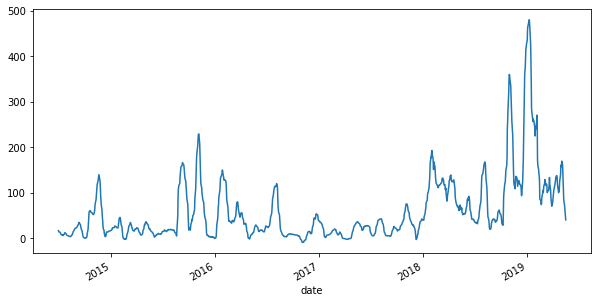

In [38]:
# Calculate 30-day rolling covariance of MSFT vs. S&P 500 and plot the data
rolling_covariance = df['MSFT'].rolling(window=30).cov(df['S&P 500'])
rolling_covariance.plot(figsize=(10,5))

## 12. Calculate 30-Day Rolling Variance of S&P 500 Returns

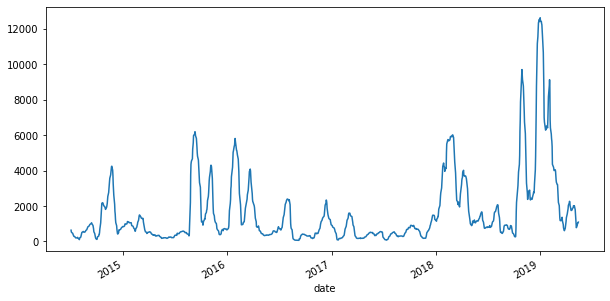

In [39]:
# Calculate 30-day rolling variance of MSFT vs. S&P 500 and plot the data
rolling_variance = df['S&P 500'].rolling(window=30).var()
rolling_variance.plot(figsize=(10,5))

## 13. Calculate 30-Day Rolling Beta of MSFT

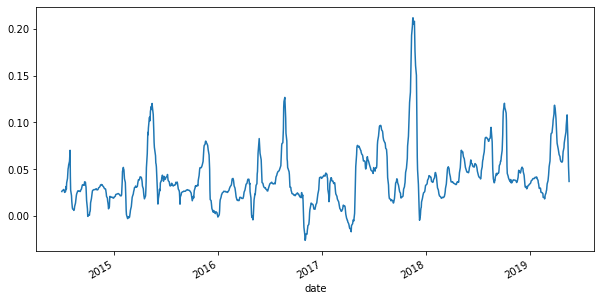

In [40]:
# Calculate 30-day rolling beta of MSFT and plot the data
rolling_beta_msft = rolling_covariance / rolling_variance
rolling_beta_msft.plot(figsize=(10,5))

## 14. Beta vs. Correlation

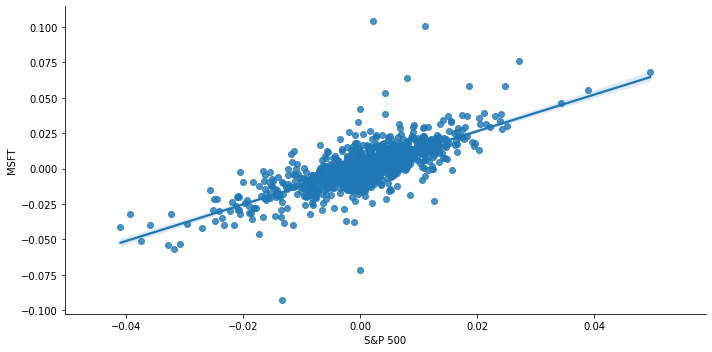

In [31]:
# Showcase beta vs. correlation by plotting a scatterplot using the seaborn library and fitting a regression line
import seaborn as sns
sns.lmplot(x='S&P 500', y='MSFT', data=daily_return, aspect=2.0, fit_reg=True)